In [ ]:
!pip install tensorflow


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


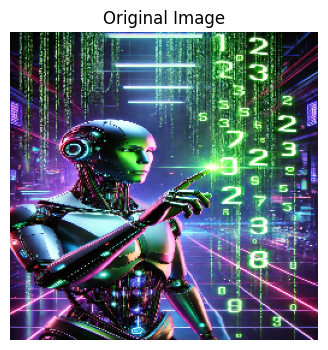

In [2]:
# Load the sample image
img = tf.keras.preprocessing.image.load_img('/content/Untitled.jpg', target_size=(256, 256))  # Resize to 256x256
x = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to numpy array
x = np.expand_dims(x, axis=0)  # Add a batch dimension

# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()


In [3]:
datagen = ImageDataGenerator(
    rotation_range=40,           # Random rotation up to 40 degrees
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Zoom in/out
    horizontal_flip=True,        # Random horizontal flip
    fill_mode='nearest'          # Fill missing pixels after transformations
)


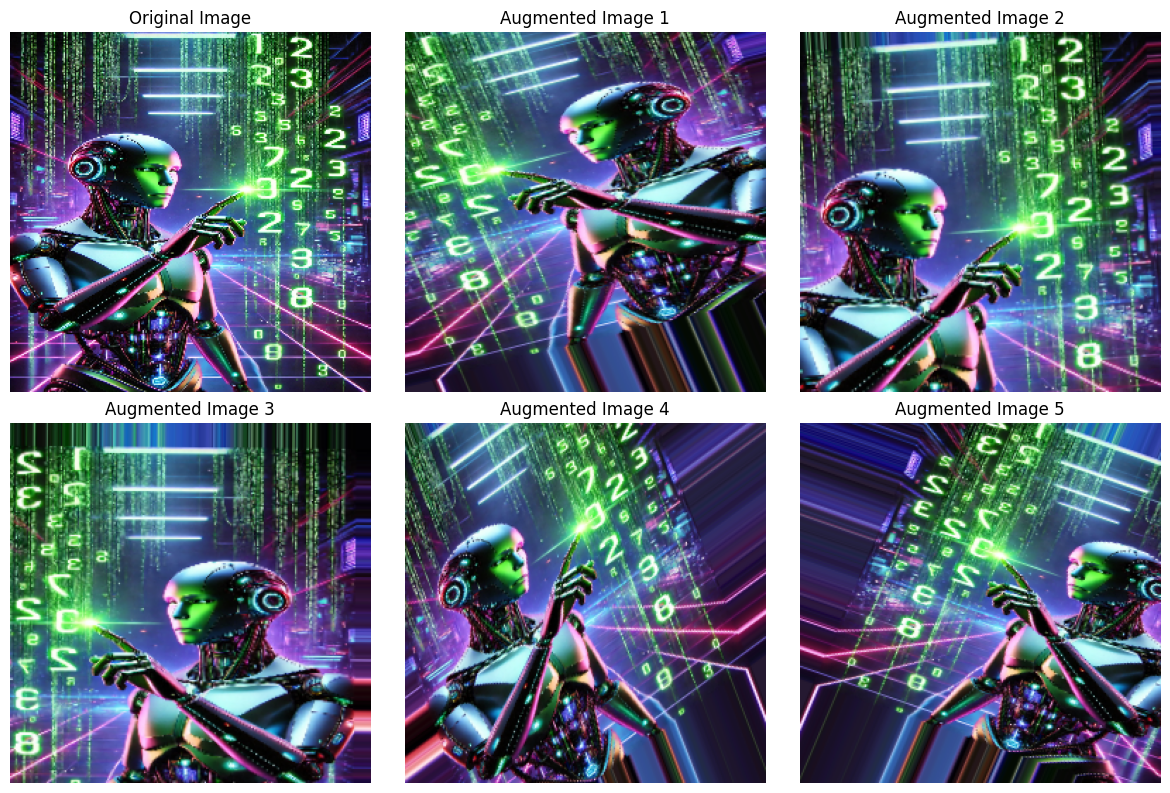

In [4]:
# Generate augmented images
augmented_images = []
for batch in datagen.flow(x, batch_size=1): # We use the flow method to generate augmented versions of the image.
    augmented_images.append(batch[0].astype('uint8'))  # Store augmented images
    if len(augmented_images) == 5:  # Generate 5 augmented images
        break

# Plot original and augmented images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(x[0].astype('uint8'))
plt.title('Original Image')
plt.axis('off')

# Augmented images
for i, aug_img in enumerate(augmented_images):
    plt.subplot(2, 3, i + 2)
    plt.imshow(aug_img)
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
